In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [66]:
data = pd.read_excel('data_pred.xlsx', header=0)
data.head()

,Net Investment,Month,Year,Client,Purchases,Redemptions,End AUM,Performance
0,-66194.22,January,2009,AMERIPRISE FINANCIAL INC.,2.996516e+07,-3.003136e+07,1.274382e+09,Positive
1,0.00,January,2009,ASH ACCOUNT,0.000000e+00,0.000000e+00,5.747591e+08,Positive
2,49457646.06,January,2009,CHARLES SCHWAB CORPORATION,1.575096e+08,-1.080519e+08,5.557057e+09,Positive
3,42396369.10,January,2009,FIDELITY INVESTMENTS,1.592842e+08,-1.168878e+08,2.920955e+09,Positive
4,-49979820.33,January,2009,GREAT-WEST FINANCIAL,7.473646e+07,-1.247163e+08,2.868240e+09,Positive


In [68]:
data.tail()

,Net Investment,Month,Year,Client,Purchases,Redemptions,End AUM,Performance
1127,-2.731277e+08,June,2018,GREAT-WEST FINANCIAL,5.395892e+08,-8.127170e+08,4.163255e+09,Negative
1128,-8.243304e+07,June,2018,MASS MUTUAL,4.342893e+08,-5.167224e+08,4.745940e+09,Negative
1129,-1.787312e+08,June,2018,"NATIONWIDE FINANCIAL SERVICES, INC.",2.474587e+08,-4.261898e+08,2.935620e+09,Negative
1130,-1.160424e+08,June,2018,NORTHWESTERN MUTUAL,2.052687e+08,-3.213110e+08,3.241054e+09,Negative
1131,1.873374e+07,June,2018,WELLS FARGO & COMPANY,6.377461e+08,-6.190123e+08,4.437249e+09,Negative


In [69]:
data.groupby('Performance').mean()

,Net Investment,Year,Purchases,Redemptions,End AUM
Performance,,,,,
Negative,-1.327993e+08,2015.142857,5.809049e+08,-7.137041e+08,5.925179e+09
Positive,1.774816e+08,2012.216292,7.318342e+08,-5.543526e+08,4.412438e+09


In [70]:
data.groupby('Month').mean()

,Net Investment,Year,Purchases,Redemptions,End AUM
Month,,,,,
April,4.259816e+07,2013.545455,4.357213e+08,-3.931231e+08,5.013280e+09
August,8.866116e+07,2013.044944,8.621490e+08,-7.734878e+08,4.918214e+09
December,8.393870e+07,2013.111111,1.230270e+09,-1.146331e+09,5.070265e+09
February,3.139118e+07,2013.545455,2.334544e+08,-2.020632e+08,4.878086e+09
January,2.204730e+07,2013.545455,1.389183e+08,-1.168710e+08,4.826866e+09
July,1.065478e+08,2013.044944,7.621033e+08,-6.555555e+08,4.987984e+09
June,5.713736e+07,2013.545455,6.466427e+08,-5.895054e+08,5.076285e+09
March,1.837412e+07,2013.545455,3.263651e+08,-3.079909e+08,4.932386e+09
May,3.672527e+07,2013.545455,5.420261e+08,-5.053008e+08,5.011771e+09


In [ ]:
%matplotlib inline
pd.crosstab(data.Month,data.Purchases).plot(kind='bar')

plt.title('Net Investment Performance By Month')
plt.xlabel('Net Investment')
plt.ylabel('Performance')


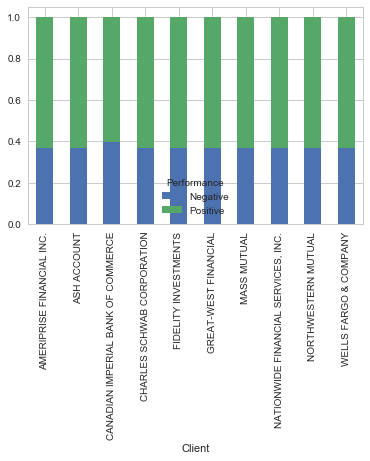

In [72]:
table=pd.crosstab(data.Client,data.Performance)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [73]:
data.head()

,Net Investment,Month,Year,Client,Purchases,Redemptions,End AUM,Performance
0,-66194.22,January,2009,AMERIPRISE FINANCIAL INC.,2.996516e+07,-3.003136e+07,1.274382e+09,Positive
1,0.00,January,2009,ASH ACCOUNT,0.000000e+00,0.000000e+00,5.747591e+08,Positive
2,49457646.06,January,2009,CHARLES SCHWAB CORPORATION,1.575096e+08,-1.080519e+08,5.557057e+09,Positive
3,42396369.10,January,2009,FIDELITY INVESTMENTS,1.592842e+08,-1.168878e+08,2.920955e+09,Positive
4,-49979820.33,January,2009,GREAT-WEST FINANCIAL,7.473646e+07,-1.247163e+08,2.868240e+09,Positive


In [74]:
from sklearn.utils import shuffle

df = shuffle(data, random_state=0)
df.head()

,Net Investment,Month,Year,Client,Purchases,Redemptions,End AUM,Performance
14,4.123465e+08,February,2009,MASS MUTUAL,1.002455e+09,-5.901089e+08,8.667740e+08,Positive
957,5.615290e+07,January,2017,GREAT-WEST FINANCIAL,1.616895e+08,-1.055366e+08,4.126943e+09,Negative
495,1.227206e+07,March,2013,CHARLES SCHWAB CORPORATION,7.416295e+08,-7.293574e+08,1.180110e+10,Negative
608,-1.056607e+07,February,2014,MASS MUTUAL,2.026266e+08,-2.131927e+08,2.424949e+09,Negative
529,-1.851401e+08,June,2013,"NATIONWIDE FINANCIAL SERVICES, INC.",2.534417e+08,-4.385818e+08,2.839302e+09,Negative


In [75]:
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()

df['Performance'] = le_dep.fit_transform(df['Performance'])
df.head()

,Net Investment,Month,Year,Client,Purchases,Redemptions,End AUM,Performance
14,4.123465e+08,February,2009,MASS MUTUAL,1.002455e+09,-5.901089e+08,8.667740e+08,1
957,5.615290e+07,January,2017,GREAT-WEST FINANCIAL,1.616895e+08,-1.055366e+08,4.126943e+09,0
495,1.227206e+07,March,2013,CHARLES SCHWAB CORPORATION,7.416295e+08,-7.293574e+08,1.180110e+10,0
608,-1.056607e+07,February,2014,MASS MUTUAL,2.026266e+08,-2.131927e+08,2.424949e+09,0
529,-1.851401e+08,June,2013,"NATIONWIDE FINANCIAL SERVICES, INC.",2.534417e+08,-4.385818e+08,2.839302e+09,0


In [76]:
# perform data transformation. Creates dummies of any categorical feature
for col in df.columns[1:]:
    attName = col
    dType = df[col].dtype
    missing = pd.isnull(df[col]).any()
    uniqueCount = len(df[attName].value_counts(normalize=False))
    # discretize (create dummies)
    if dType == object:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        del df[attName]
        
df.shape
df.describe()

,Net Investment,Year,Purchases,Redemptions,End AUM,Performance,Month_April,Month_August,Month_December,Month_February,...,Client_AMERIPRISE FINANCIAL INC.,Client_ASH ACCOUNT,Client_CANADIAN IMPERIAL BANK OF COMMERCE,Client_CHARLES SCHWAB CORPORATION,Client_FIDELITY INVESTMENTS,Client_GREAT-WEST FINANCIAL,Client_MASS MUTUAL,"Client_NATIONWIDE FINANCIAL SERVICES, INC.",Client_NORTHWESTERN MUTUAL,Client_WELLS FARGO & COMPANY
count,1.132000e+03,1132.000000,1.132000e+03,1.132000e+03,1.132000e+03,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,...,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,6.235974e+07,2013.302120,6.758357e+08,-6.134759e+08,4.973703e+09,0.628975,0.087456,0.078622,0.079505,0.087456,...,0.100707,0.100707,0.093640,0.100707,0.100707,0.100707,0.100707,0.100707,0.100707,0.100707
std,5.054662e+08,2.744446,6.685646e+08,6.266969e+08,3.193249e+09,0.483293,0.282627,0.269267,0.270645,0.282627,...,0.301073,0.301073,0.291455,0.301073,0.301073,0.301073,0.301073,0.301073,0.301073,0.301073
min,-1.742728e+09,2009.000000,0.000000e+00,-3.710606e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.123984e+08,2011.000000,1.987351e+08,-8.792348e+08,2.762111e+09,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,2013.000000,4.472616e+08,-4.351950e+08,3.794480e+09,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.440988e+08,2016.000000,9.997254e+08,-1.376288e+08,7.348112e+09,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.122466e+09,2018.000000,4.106022e+09,0.000000e+00,1.313582e+10,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=.2, random_state=0)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(905, 27)
(227, 27)
(905,)
(227,)


In [78]:
import statsmodels.api as sm
logit_model=sm.GLM(y,X)
result=logit_model.fit()
print(result.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:         Net Investment   No. Observations:                    1132
Model:                            GLM   Df Residuals:                        1107
Model Family:                Gaussian   Df Model:                              24
Link Function:               identity   Scale:              0.0026747901407790714
Method:                          IRLS   Log-Likelihood:                    1759.3
Date:                Tue, 17 Jul 2018   Deviance:                          2.9610
Time:                        01:56:26   Pearson chi2:                        2.96
No. Iterations:                     2                                            
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Year                                    